## Лабораторна робота 4. **REGRESSION** 📈

# Опис вибірки "Motorbike Ambulance Calls"


Аварії за участю мотоциклів та відповідні виклики швидкої допомоги сильно залежать від екологічних та сезонних умов, таких як погодні умови, опади, день тижня, сезон, година дня тощо. Дані збирались протягом двох років щогодини та потім співвідносилися з відповідною погодою та сезонністю.

Основні характеристики вибірки `motorbike_ambulance_calls.csv`:

              - index: record index
              - date : date
              - season : season (1:springer, 2:summer, 3:fall, 4:winter)
              - yr : year (0: 2011, 1:2012)
              - mnth : month ( 1 to 12)
              - hr : hour (0 to 23)
              - holiday : whether day is holiday or not
              - weekday : day of the week
              - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
              -  weathersit :
                      - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
                      - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
                      - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
                      - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
              - temp : Normalized temperature in Celsius. The values are divided to 41 (max)
              - atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
              - hum: Normalized humidity. The values are divided to 100 (max)
              - windspeed: Normalized wind speed. The values are divided to 67 (max)
              - cnt: count of total ambulance calls

## Імпорт необхідних бібліотек та завантаження даних

**Завдання 1** підготовка даних до опрацювання

1. завантажте вибірку `motorbike_ambulance_calls.csv`;   
2. підключіть необхідні бібліотеки;  
3. вивести основну статистичну інформацію по числовим змінним;  
4. окремо вивести максимальні та мінімальні значення по всім змінним;  
5. вивести розмірність датасету;

In [207]:
import pandas as pd
import numpy as np
import scipy as sc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [208]:
def get_data(data_path: str):
  return pd.read_csv(data_path)

In [209]:
dataset_calls = get_data(data_path='motorbike_ambulance_calls.csv')
dataset_calls.head(10)

,index,date,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1/1/11,spring,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,2,1/1/11,spring,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,3,1/1/11,spring,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,4,1/1/11,spring,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,5,1/1/11,spring,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
5,6,1/1/11,spring,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,1
6,7,1/1/11,spring,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2
7,8,1/1/11,spring,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,3
8,9,1/1/11,spring,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,8
9,10,1/1/11,spring,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,14


**Завдання 2** перевірити типи даних та перевірте кількість даних по кожній змінній.

In [210]:
print(f"Types: {dataset_calls.dtypes}")
print(f"\nCount: {dataset_calls.count()}")

Types: index           int64
date           object
season         object
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

Count: index         17379
date          17379
season        17379
yr            17379
mnth          17379
hr            17379
holiday       17379
weekday       17379
workingday    17379
weathersit    17379
temp          17379
atemp         17379
hum           17379
windspeed     17379
cnt           17379
dtype: int64


**Завдання 3** пепевірте всі змінні на наявність пропусків.

In [211]:
dataset_calls.isna().sum()

index         0
date          0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

**Висновки з 1-3 завдання (детальні)**



1.   
2.   
3. ...



**Завдання 4** перетворіть змінну `date` в **date type**. Визначте часові межі датасету.

In [212]:
def transform_date(df: pd.DataFrame, date_col_name: str):
  df[date_col_name] = pd.to_datetime(df[date_col_name])
  return df
  
dataset_calls = transform_date(dataset_calls, 'date')

dataset_calls.head(10)

,index,date,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,2011-01-01,spring,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,2,2011-01-01,spring,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,3,2011-01-01,spring,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,4,2011-01-01,spring,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,5,2011-01-01,spring,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
5,6,2011-01-01,spring,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,1
6,7,2011-01-01,spring,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2
7,8,2011-01-01,spring,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,3
8,9,2011-01-01,spring,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,8
9,10,2011-01-01,spring,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,14


In [213]:
def get_time_limits(df: pd.DataFrame, date_col_name: str):
  first_day = df[date_col_name].min()
  last_day = df[date_col_name].max()
  print(f"First day of dataset - {first_day}.\nLast day of dataset - {last_day}")

get_time_limits(dataset_calls, "date")

First day of dataset - 2011-01-01 00:00:00.
Last day of dataset - 2012-12-31 00:00:00


In [214]:
#your conclusions

#Аналіз категоріальних змінних

**Завдання 5** виділити категоріальні змінні в окремий датасет







In [215]:
data_categorical = dataset_calls.loc[:, ["season", "yr", "mnth", "hr", "holiday", "weekday", "workingday", "weathersit"]]
data_categorical

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit
0,spring,0,1,0,0,6,0,1
1,spring,0,1,1,0,6,0,1
2,spring,0,1,2,0,6,0,1
3,spring,0,1,3,0,6,0,1
4,spring,0,1,4,0,6,0,1
...,...,...,...,...,...,...,...,...
17374,spring,1,12,19,0,1,1,2
17375,spring,1,12,20,0,1,1,2
17376,spring,1,12,21,0,1,1,1
17377,spring,1,12,22,0,1,1,1


**Завдання 6** перетворіть змінну `season` в числову шкалу.

In [216]:
def encode_season(df: pd.DataFrame, season_col_name: str):
  df[season_col_name] = df[season_col_name].apply(lambda x: 0 if x == 'spring' else (1 if x == 'summer' else (2 if x == 'autumn' else 3)))
  return df
  
dataset_calls = encode_season(dataset_calls, 'season')

In [217]:
dataset_calls.sample(10)

,index,date,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
6769,6770,2011-10-14,3,0,10,15,0,5,1,1,0.62,0.6212,0.43,0.2836,230
10500,10501,2012-03-18,0,1,3,15,0,0,0,1,0.54,0.5152,0.68,0.0896,554
911,912,2011-02-10,0,0,2,12,0,4,1,1,0.16,0.1364,0.34,0.3881,69
11507,11508,2012-04-29,1,1,4,16,0,0,0,1,0.60,0.6061,0.28,0.1940,587
16554,16555,2012-11-27,3,1,11,12,0,2,1,3,0.28,0.2576,0.87,0.3881,76
2408,2409,2011-04-15,1,0,4,6,1,5,0,1,0.36,0.3636,0.81,0.0896,47
15672,15673,2012-10-20,3,1,10,5,0,6,0,1,0.40,0.4091,0.82,0.0000,13
6486,6487,2011-10-02,3,0,10,20,0,0,0,2,0.36,0.3333,0.76,0.2537,87
16516,16517,2012-11-25,3,1,11,22,0,0,0,1,0.24,0.2879,0.60,0.0000,62
10271,10272,2012-03-09,0,1,3,1,0,5,1,3,0.56,0.5303,0.52,0.4925,26


**Завдання 7** побудувати графіки `countplot` по всім категоріальним змінним

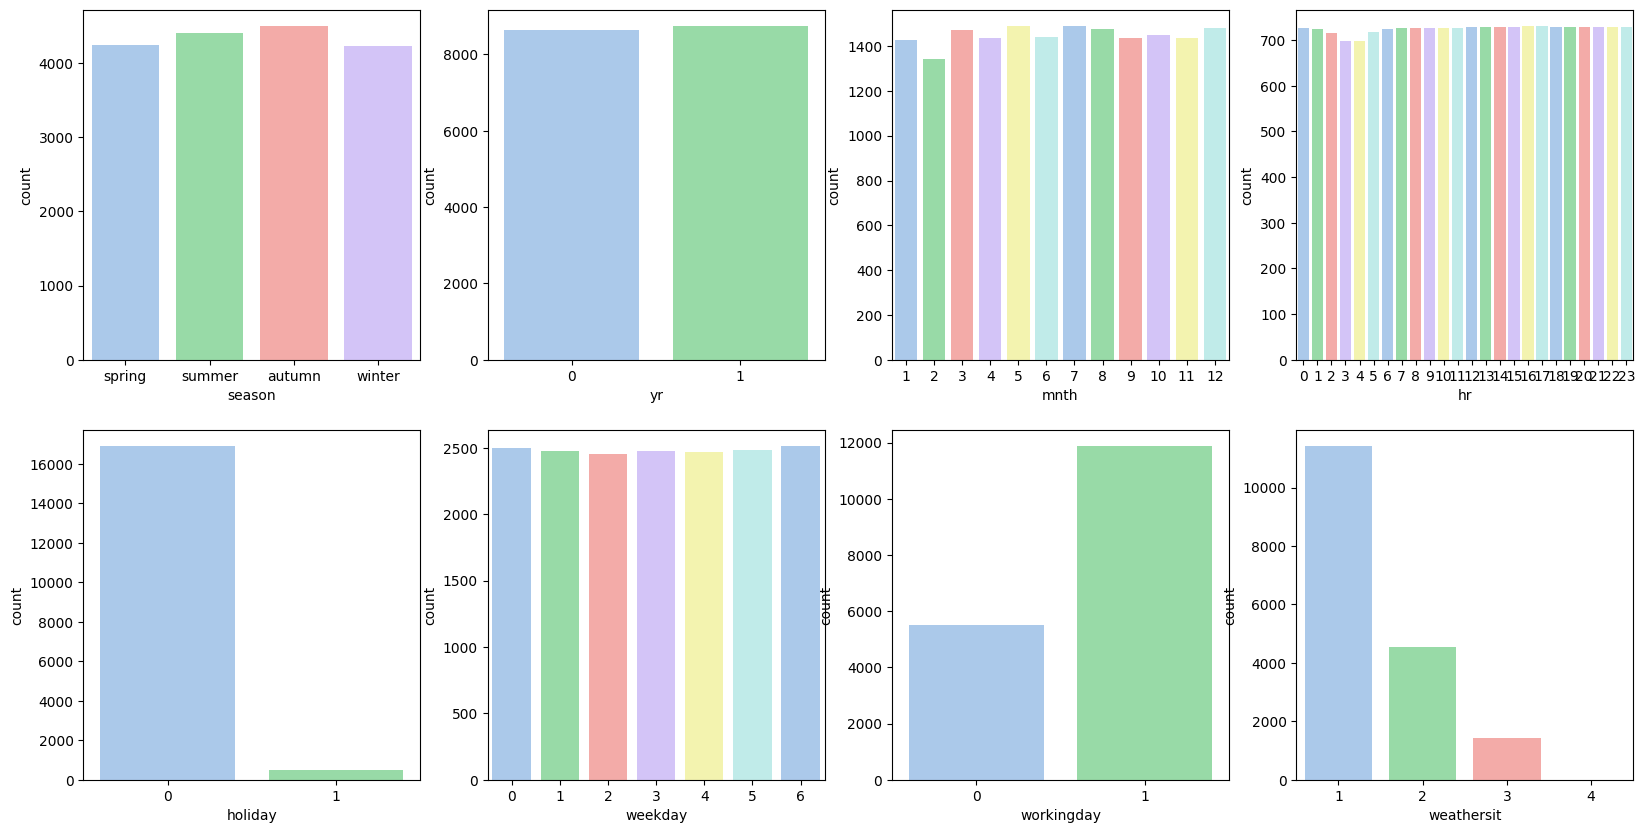

In [218]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(data_categorical, ax.flatten()):
  sns.countplot(data=data_categorical, x=variable, ax=subplot, palette='pastel6')

**Висновки з 5-7 завдання (детальні)**



1.   
2.   
3. ...



#Аналіз числових змінних

**Завдання 8** виділити числові змінні в окремий датасет

In [219]:
data_numerical = dataset_calls.loc[:, ["temp", "hum", "atemp", "cnt"]]
data_numerical

,temp,hum,atemp,cnt
0,0.24,0.81,0.2879,16
1,0.22,0.80,0.2727,40
2,0.22,0.80,0.2727,32
3,0.24,0.75,0.2879,13
4,0.24,0.75,0.2879,1
...,...,...,...,...
17374,0.26,0.60,0.2576,119
17375,0.26,0.60,0.2576,89
17376,0.26,0.60,0.2576,90
17377,0.26,0.56,0.2727,61


**Завдання 9** побудуйте гістограми розподілу по всім числовим змінним

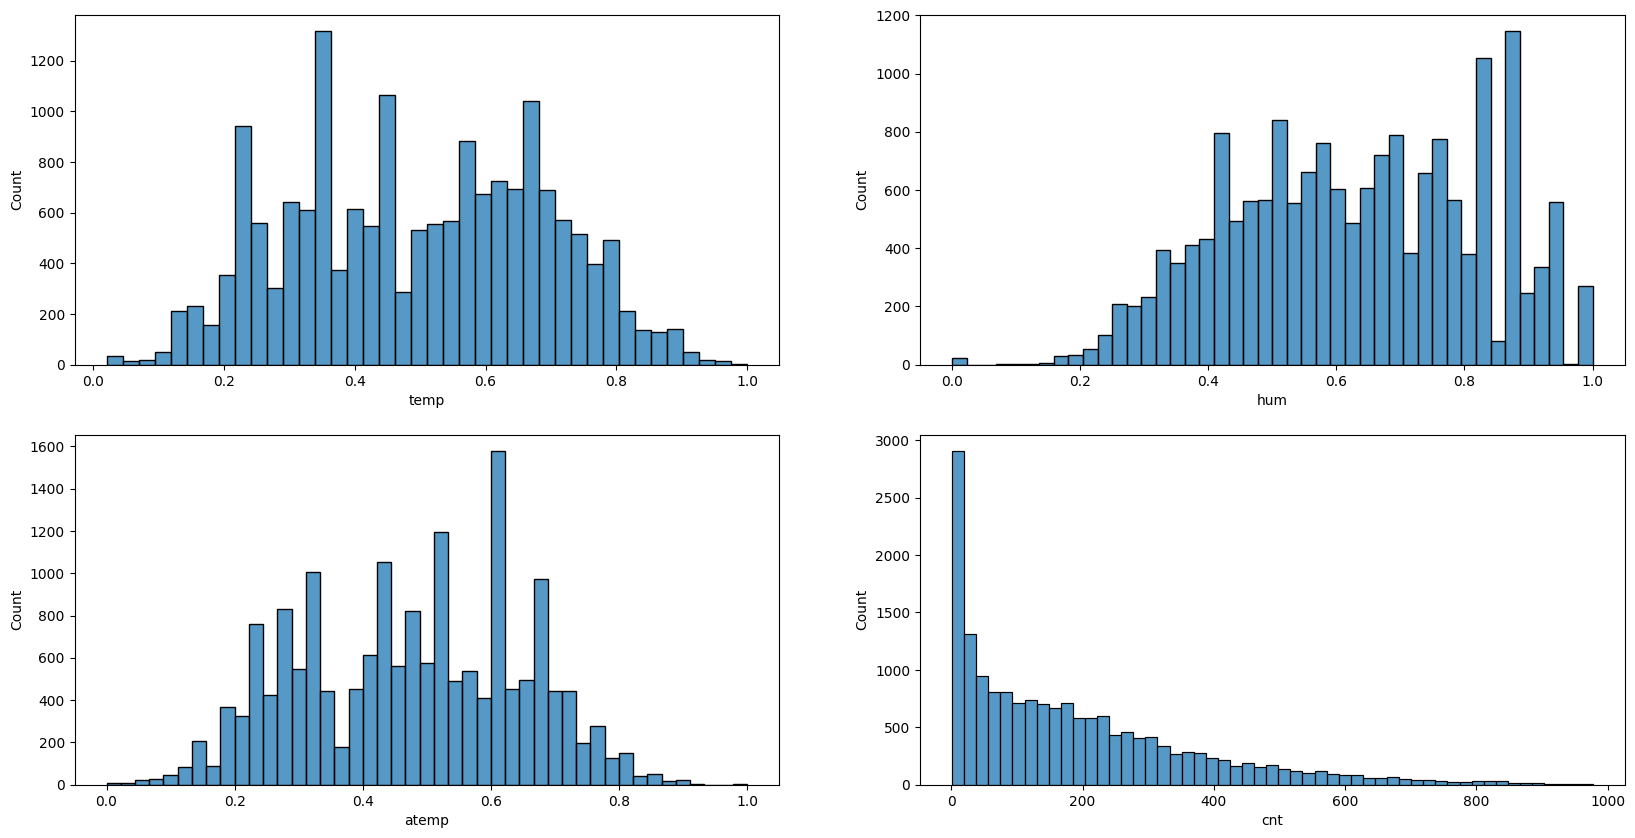

In [220]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
for variable, subplot in zip(data_numerical, ax.flatten()):
  sns.histplot(data=data_numerical, x=variable, ax=subplot, palette='pastel6')

**Завдання 10** побудуйте гістограму розподілу цільової змінної та розрахуйте коефіціент нахилу

Skewness: 1.2773013463494975


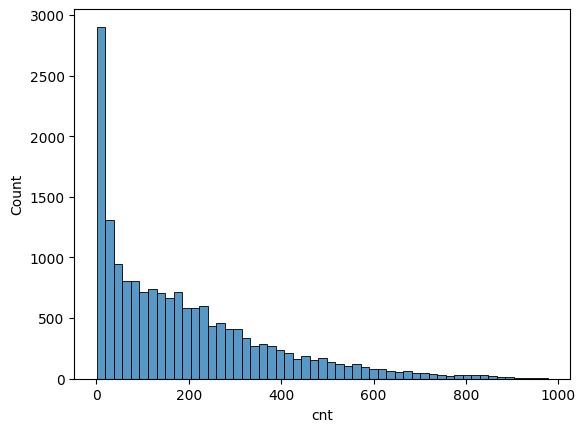

In [221]:
sns.histplot(data=dataset_calls, x="cnt", palette='pastel6')

skewness = sc.stats.skew(dataset_calls["cnt"])
print(f'Skewness: {skewness}')

**Висновки з 8-10 завдання (детальні)**



1.   
2.   
3. ...



#Аналіз взаємозв'язків між числовими і категоріальними змінними

**Завдання 11** побудуйте графіки співвідношення `scatterplot` між всіма числовими змінними і цільовою змінною `cnt`

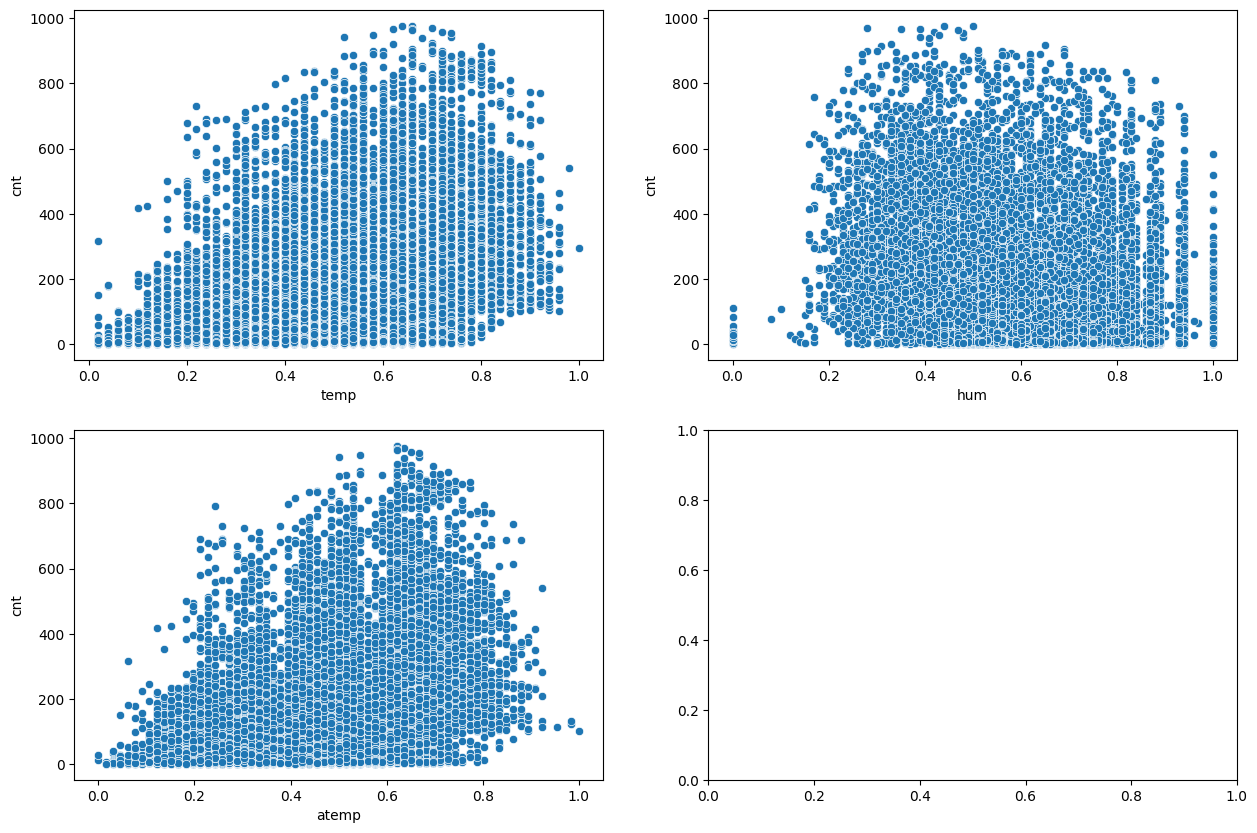

In [222]:
fig, ax = plt.subplots(2,2, figsize=(15, 10))
for var, subplot in zip(data_numerical.drop('cnt', axis=1), ax.flatten()):
  sns.scatterplot(data=data_numerical, x=var, y=dataset_calls['cnt'], ax=subplot, palette='pastel6')

**Завдання 12** побудуйте графіки співвідношення `boxplot`[boxplot](https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html) між категоріальними змінними і цільовою змінною `cnt`.

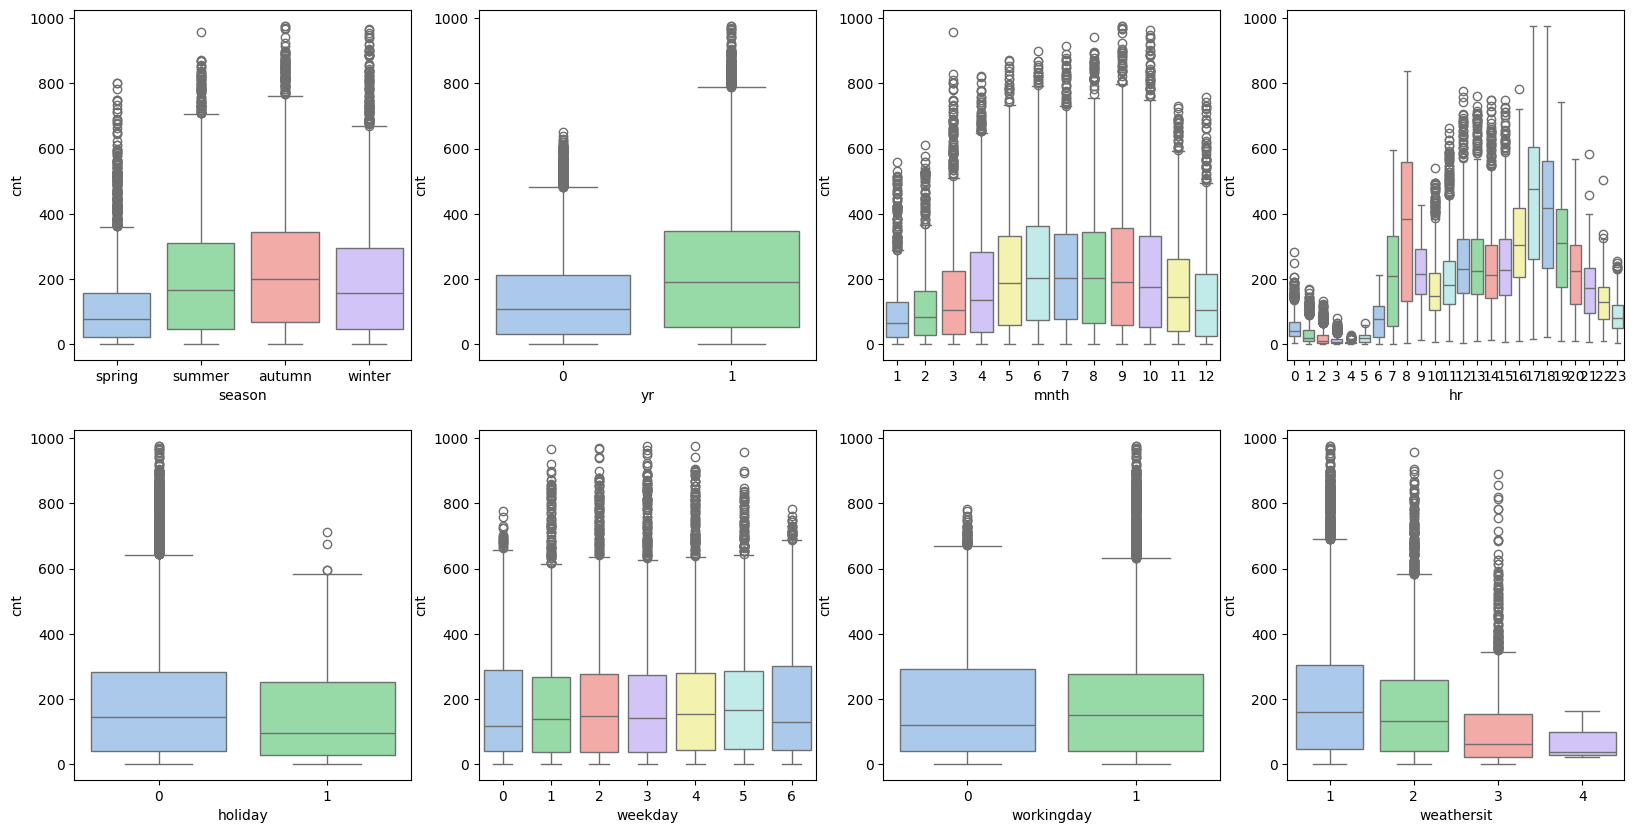

In [223]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for var, subplot in zip(data_categorical, ax.flatten()):
  sns.boxplot(data=data_categorical, x=var, y=dataset_calls['cnt'], ax=subplot, palette='pastel6')

**Висновки з 11-12 завдання (детальні)**



1.   
2.   
3. ...



**Завдання 13** Побудувати матрицю кореляції:  

1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти  
3.   Вирахувати кореляційні коефіціенти для набору данних за методом Спірмана
4.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

5. Описати отримані результати, спираючись на значення коефіціентів кореляції та пояснити в чому відмінність обраних методів.

<Figure size 2000x2000 with 0 Axes>

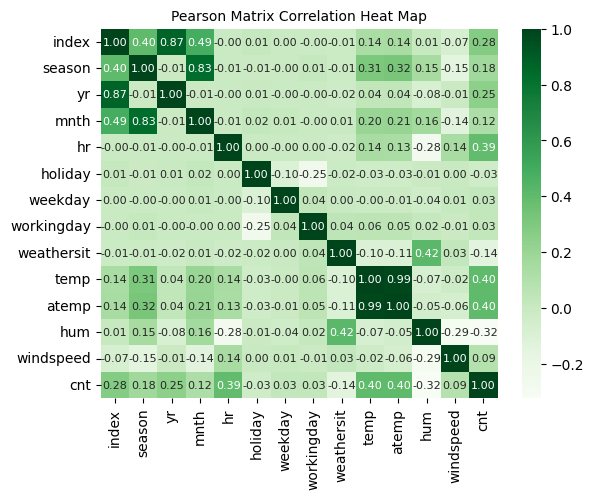

<Figure size 2000x2000 with 0 Axes>

In [224]:
pearson_corr = dataset_calls.select_dtypes(include={"float64", "int64"}).corr(method='pearson')
sns.heatmap(pearson_corr, annot=True ,cmap='Greens', fmt='.2f', annot_kws={"size": 8})
plt.title("Pearson Matrix Correlation Heat Map", fontsize=10)
plt.figure(figsize=(20, 20))

<Figure size 2000x2000 with 0 Axes>

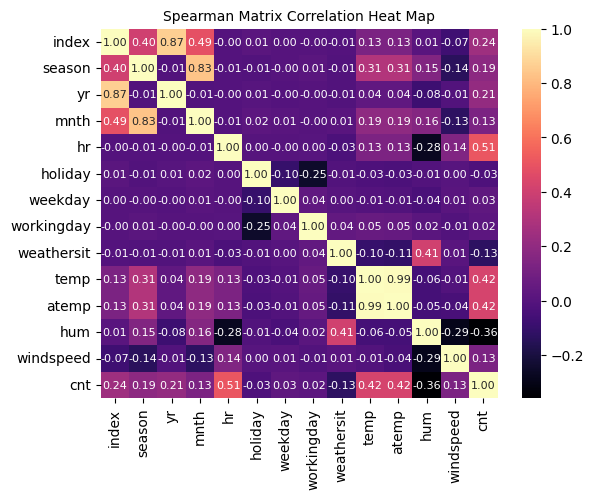

<Figure size 2000x2000 with 0 Axes>

In [225]:
spearman_corr = dataset_calls.select_dtypes(include={"float64", "int64"}).corr(method='spearman')
sns.heatmap(spearman_corr, annot=True ,cmap='magma', fmt='.2f', annot_kws={"size": 8})
plt.title("Spearman Matrix Correlation Heat Map", fontsize=10)
plt.figure(figsize=(20, 20))

In [226]:
#your conclusions 

**Завдання 14** 
1. побудувати модель лінійної регресії:
2. видалити змінні, які НЕ є релевантними;

3. поділити вибірку на `train`, `test` та `validation` в пропорції `70/30`;  

4. провести навчання моделі лінійної регресії;

1. Для подальшої роботи з моделями для кожної категоріальної змінної ми створимо фіктивні змінні, щоб уникнути неправильного порядку категорій. [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)

In [227]:
def get_dummies(df: pd.DataFrame):
  features = pd.concat([df,
                      pd.get_dummies(df['hr'], prefix='hr'),
                      pd.get_dummies(df['yr'], prefix='yr'),
                      pd.get_dummies(df['workingday'], prefix='workingday'),
                      pd.get_dummies(df['season'], prefix='season'),
                      pd.get_dummies(df['mnth'], prefix='mnth'),
                      pd.get_dummies(df['weekday'], prefix='weekday'),
                      pd.get_dummies(df['weathersit'], prefix='weathersit'),
                      ], axis = 1
                     )
  features = features.drop(['season',
                            'mnth', 
                            'weekday', 
                            'weathersit'
                            ], axis = 1)
  return features

In [228]:
features = get_dummies(dataset_calls)

2. На основі змінної часу створіть нову змінну, яка відповідатиме за день і ніч.

In [229]:
# 0 - night, 1 - day
features['night_hours'] = features['hr'].apply(lambda x: 0 if ((x >= 22 and x <= 23) or (x >= 0 and x <= 6)) else 1)
features = features.drop('hr', axis = 1)

In [230]:
features['night_hours'].sample(15)
features

,index,date,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,...,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3,weathersit_4,night_hours
0,1,2011-01-01,0,0,0,0.24,0.2879,0.81,0.0000,16,...,False,False,False,False,True,True,False,False,False,0
1,2,2011-01-01,0,0,0,0.22,0.2727,0.80,0.0000,40,...,False,False,False,False,True,True,False,False,False,0
2,3,2011-01-01,0,0,0,0.22,0.2727,0.80,0.0000,32,...,False,False,False,False,True,True,False,False,False,0
3,4,2011-01-01,0,0,0,0.24,0.2879,0.75,0.0000,13,...,False,False,False,False,True,True,False,False,False,0
4,5,2011-01-01,0,0,0,0.24,0.2879,0.75,0.0000,1,...,False,False,False,False,True,True,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,0,1,0.26,0.2576,0.60,0.1642,119,...,False,False,False,False,False,False,True,False,False,1
17375,17376,2012-12-31,1,0,1,0.26,0.2576,0.60,0.1642,89,...,False,False,False,False,False,False,True,False,False,1
17376,17377,2012-12-31,1,0,1,0.26,0.2576,0.60,0.1642,90,...,False,False,False,False,False,True,False,False,False,1
17377,17378,2012-12-31,1,0,1,0.26,0.2727,0.56,0.1343,61,...,False,False,False,False,False,True,False,False,False,0


**Модель лінійної регрессії  

[train_linear_model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Після отримання фіктивних змінних потрібно видалити по одній з кожної категорії, щоб запобігти мультиколінеарності. Також видаляємо ще два атрибути `date` та `atemp` - поясніть чому?

In [231]:
features_lr = features.drop(['season_0', 'mnth_4', 'weekday_0', 'weathersit_1', 'hr_0','atemp', 'date'], axis = 1)

In [233]:
def get_train_data(df: pd.DataFrame, target:str, test_size:float):
  X = df.drop(['cnt'], axis=1)
  y = df[target]
  X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=test_size, random_state=42, shuffle = True)
  return X_train, X_test, y_train, y_test

In [234]:
X_train, X_test, y_train, y_test = get_train_data(features_lr, 'cnt', 0.3)

In [237]:
def train_linear_model(X_train, y_train):
  model = LinearRegression()
  model.fit(X_train, y_train)
  return model

model = train_linear_model(X_train, y_train)

In [238]:
# predict
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
# scores
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 10448.098, test: 10101.710
R^2 train: 0.688, test: 0.680


Оскільки в нашій моделі є багато незалежних змінних, ми не можемо відобразити їх залежність у двовимірному просторі, але ми можемо побудувати графік взаємозв'язку між залишками моделі та передбачуваними значеннями, що також допоможе нам оцінити якість моделі.

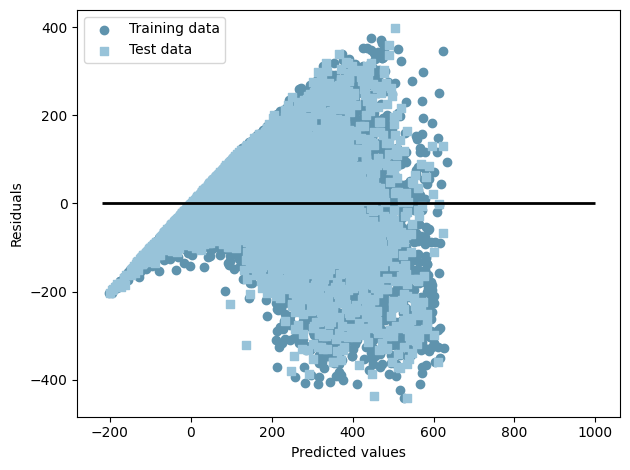

In [239]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='#5f93ad', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='#98c3d9', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-220, xmax=1000, lw=2, color='#000000')
plt.tight_layout()

**Висновки з завдання (детальні)**



1.   
2.   
3. ...

